读取数据

In [1]:
import pandas as pd

# 加载数据集
data_path = '../data/raw/cleaned_data_after_mvp.csv'
data = pd.read_csv(data_path)
data

,Index,O,N,B,S,P,Specific surface area,Pore volume,Rmic/mes,ID/IG,Electrolyte,Current collector,Active mass loading,Potential window,Current density,target
0,14.0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,14.558000,1.029,2M ZnSO4,carbon cloth,1.0,1.6,0.10,85.0
1,15.0,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,9.330000,1.038,2M ZnSO4,carbon cloth,1.0,1.6,0.10,114.0
2,21.0,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.157000,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.10,90.2
3,22.0,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.157000,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.25,86.3
4,23.0,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.157000,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.50,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,808.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.190408,2.820,2M ZnSO4,stainless-steel mesh,1.0,1.6,5.00,134.0
640,809.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.190408,2.820,2M ZnSO4,stainless-steel mesh,1.0,1.6,10.00,125.7
641,810.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.190408,2.820,2M ZnSO4,stainless-steel mesh,1.0,1.6,20.00,118.9
642,811.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.190408,2.820,2M ZnSO4,stainless-steel mesh,1.0,1.6,30.00,114.5


**统计摘要**：为所有连续和分类变量生成描述性统计。

In [2]:
# 为所有连续变量生成描述性统计
continuous_stats = data.describe()

# 为所有分类变量生成描述性统计
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_stats = data[categorical_columns].describe()

# 显示结果
continuous_stats, categorical_stats

(            Index           O           N           B           S           P  \
 count  644.000000  644.000000  644.000000  644.000000  644.000000  644.000000   
 mean   441.121118    8.841087    2.970683    0.067220    0.144115    0.150994   
 std    240.595330    4.074712    2.839623    0.304247    0.558670    0.765521   
 min     14.000000    1.900000    0.000000    0.000000    0.000000    0.000000   
 25%    217.750000    6.150000    1.090000    0.000000    0.000000    0.000000   
 50%    490.500000    8.060000    2.440000    0.000000    0.000000    0.000000   
 75%    651.250000   11.200000    3.670000    0.000000    0.000000    0.000000   
 max    812.000000   21.550000   13.570000    3.660000    4.000000    4.700000   
 
        Specific surface area  Pore volume    Rmic/mes       ID/IG  \
 count             644.000000   644.000000  644.000000  644.000000   
 mean             1712.871273     1.284345    1.273306    1.301480   
 std               879.528646     0.694200    1.65

**分布检查**：检查连续特征的分布，看它们是否近似正态分布。

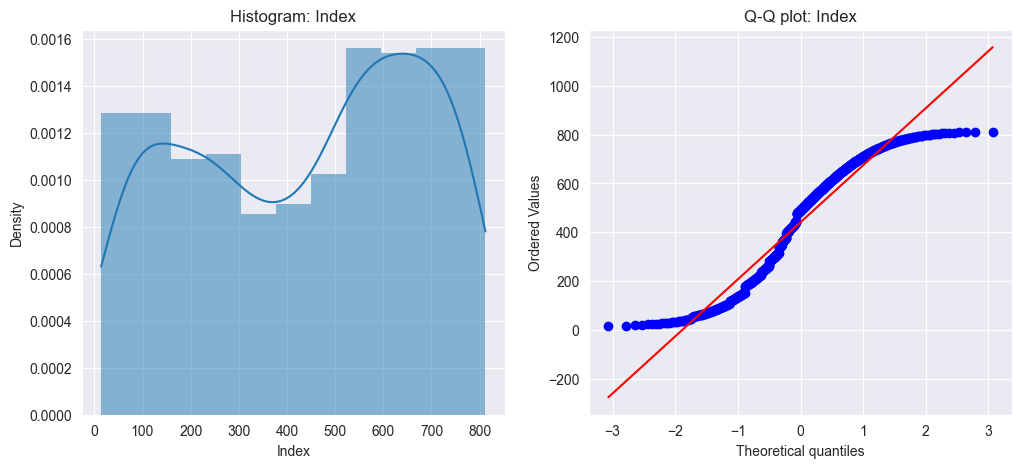

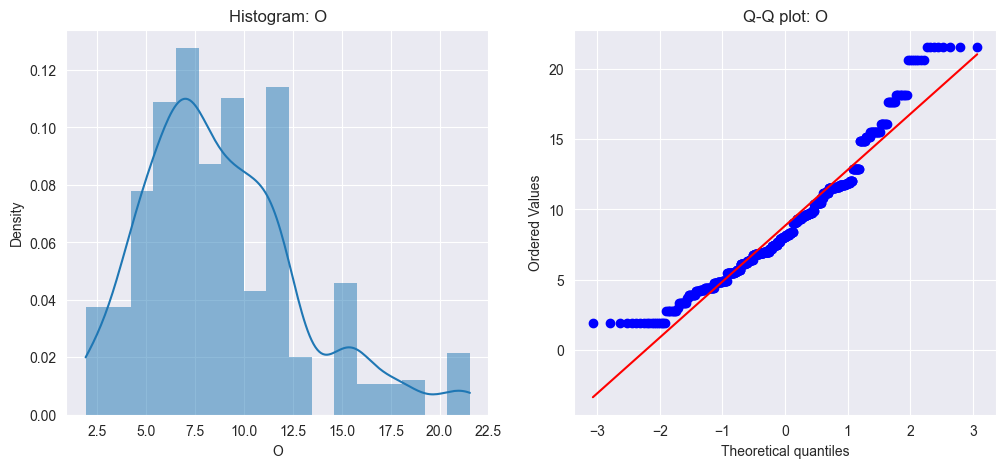

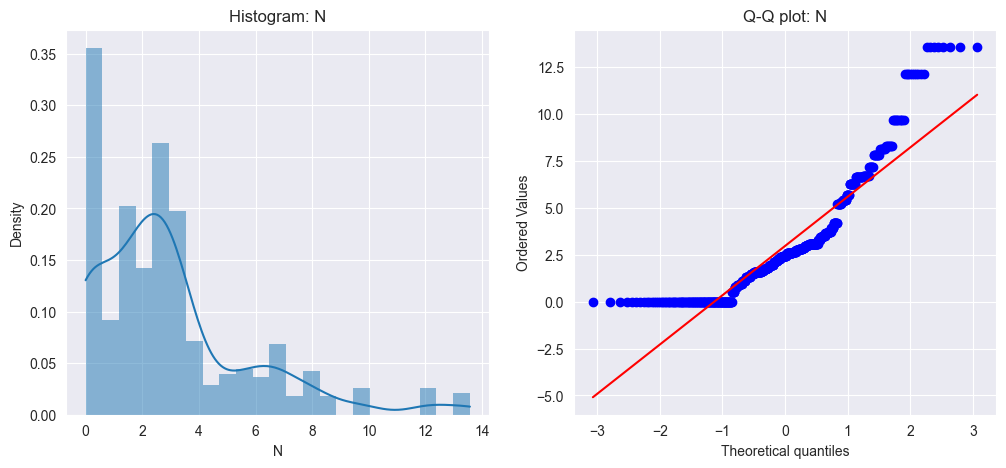

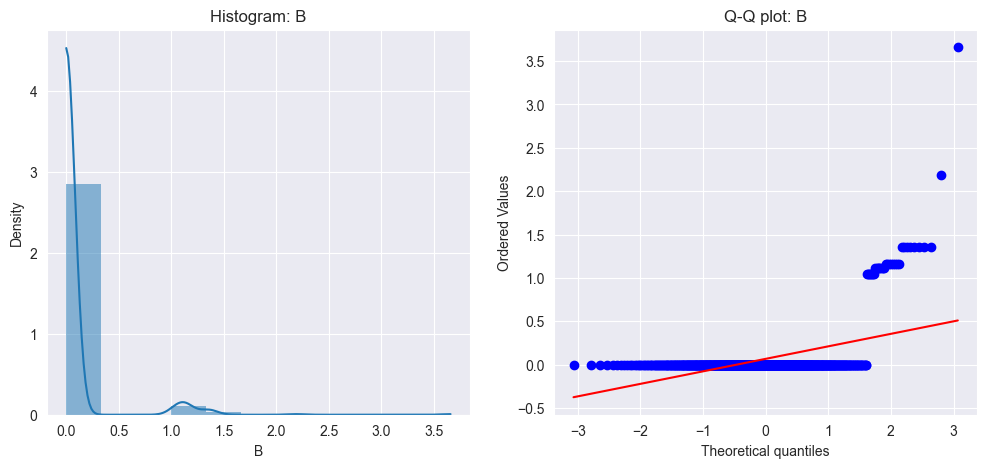

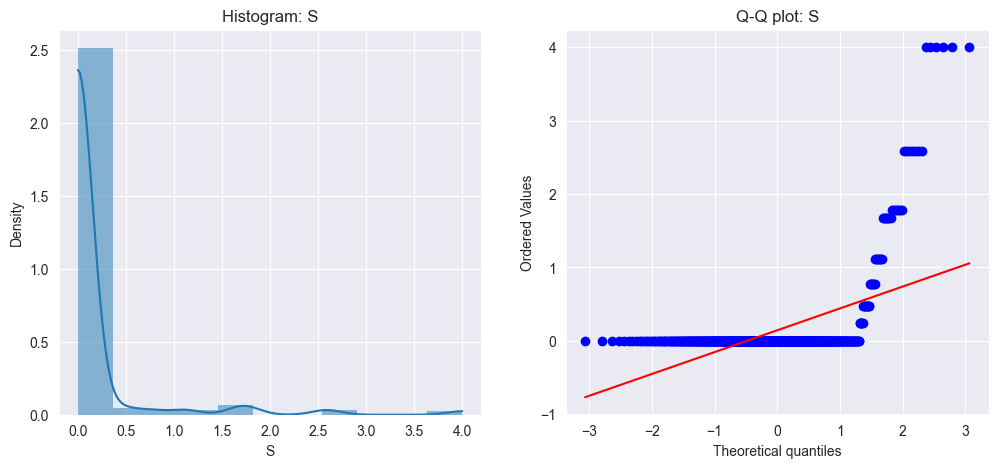

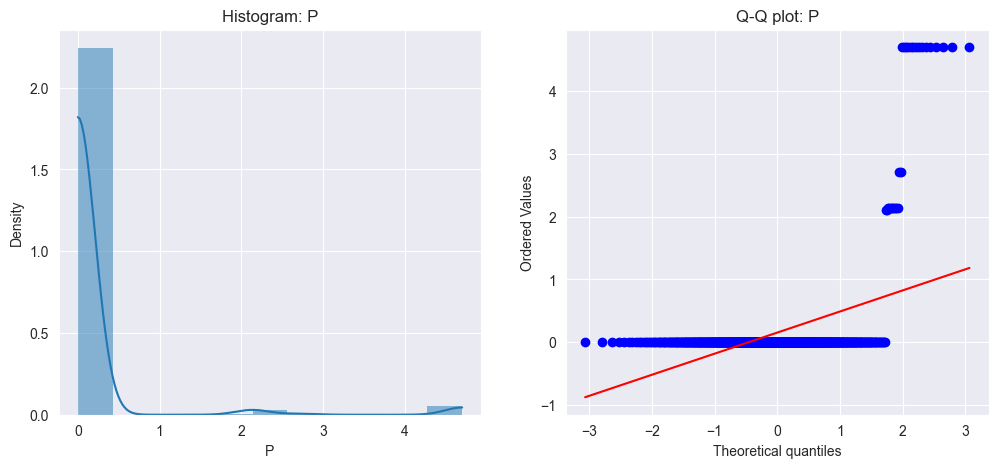

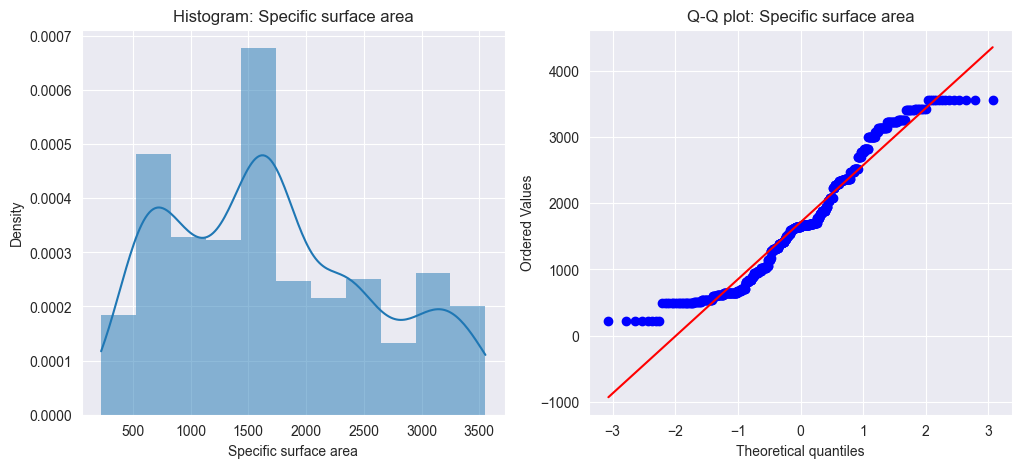

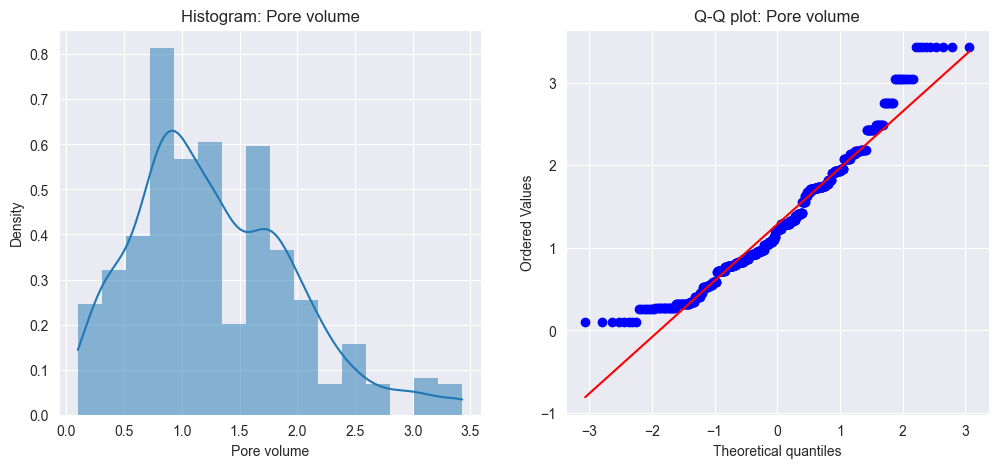

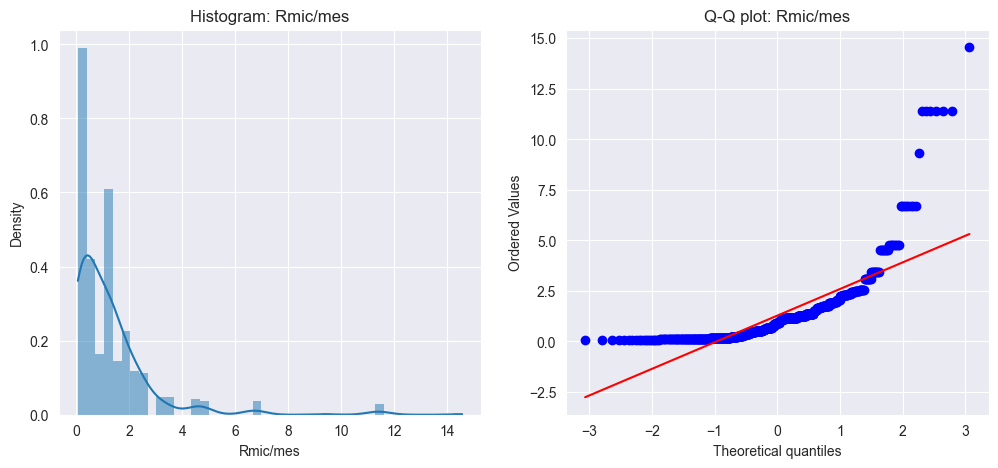

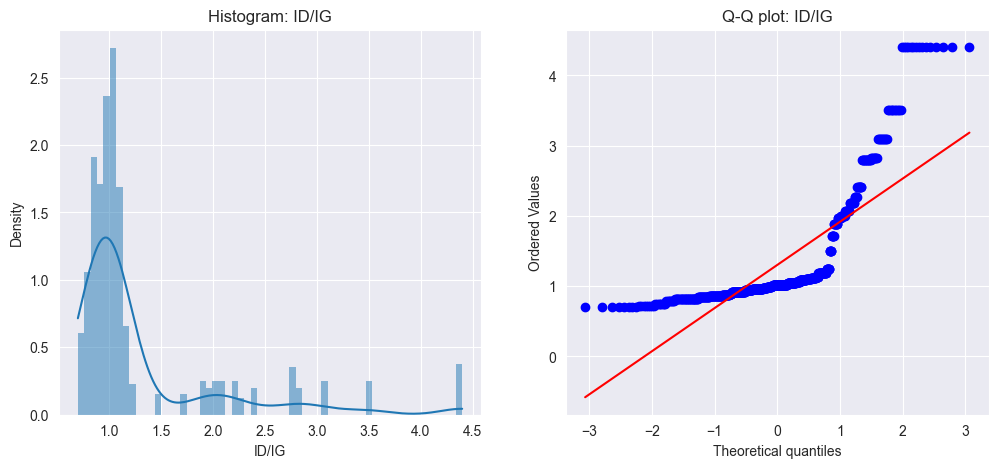

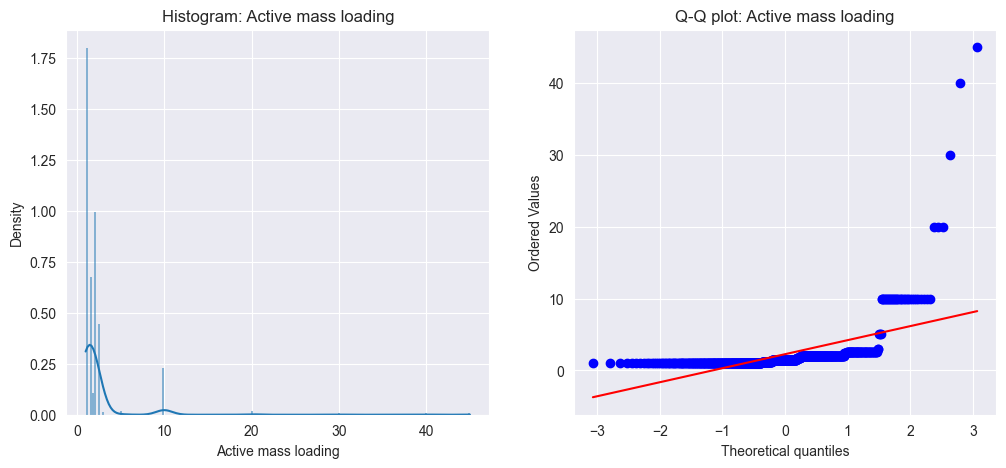

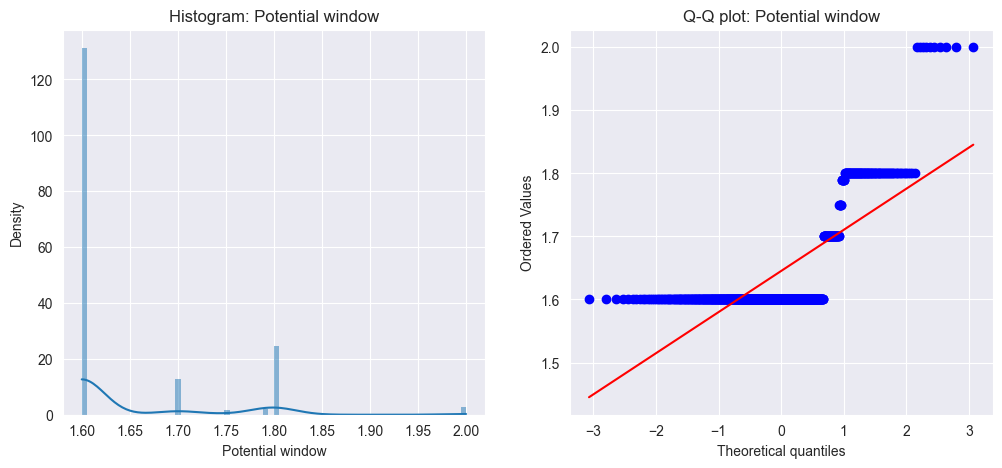

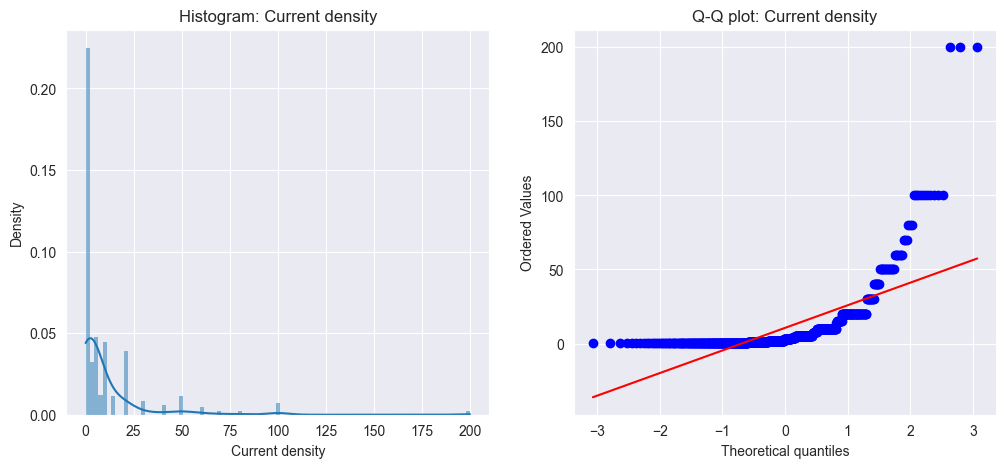

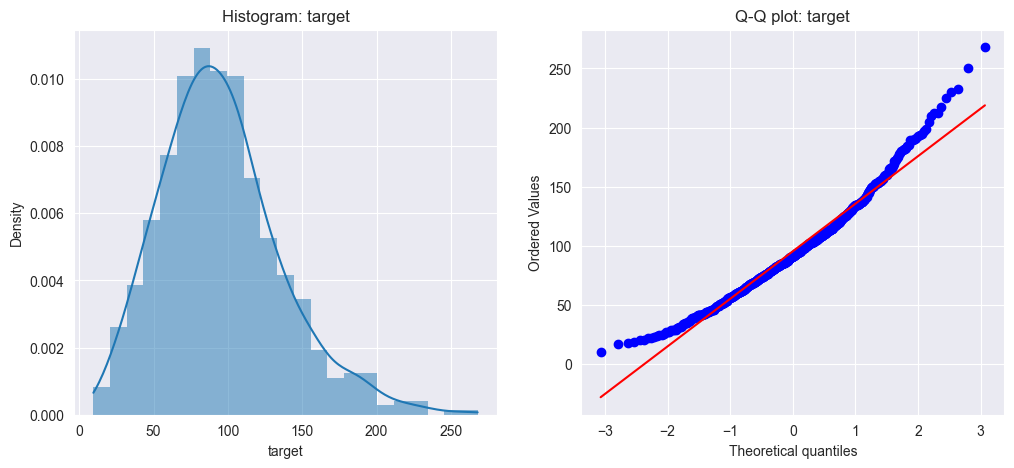

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 选择连续特征
continuous_columns = data.select_dtypes(include=[np.number]).columns

# 为每个连续特征绘制直方图和Q-Q图
for col in continuous_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # 直方图
    sns.histplot(data[col], kde=True, stat="density", linewidth=0, ax=ax[0])
    ax[0].set_title(f'Histogram: {col}')
    
    # Q-Q图
    stats.probplot(data[col], dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q plot: {col}')
    
    plt.show()

In [4]:
# 对每个连续特征执行Shapiro-Wilk测试
for col in continuous_columns:
    stat, p = stats.shapiro(data[col])
    print(f'{col}: Statistics={stat:.4f}, p={p:.4f}')
    # 解释
    alpha = 0.05
    if p > alpha:
        print('样本看起来是正态分布的 (无法拒绝H0)\n')
    else:
        print('样本看起来不是正态分布的 (拒绝H0)\n')

Index: Statistics=0.9344, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

O: Statistics=0.9455, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

N: Statistics=0.8502, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

B: Statistics=0.2269, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

S: Statistics=0.2834, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

P: Statistics=0.1927, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

Specific surface area: Statistics=0.9505, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

Pore volume: Statistics=0.9579, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

Rmic/mes: Statistics=0.6322, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

ID/IG: Statistics=0.6330, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

Active mass loading: Statistics=0.3296, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

Potential window: Statistics=0.5693, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

Current density: Statistics=0.4886, p=0.0000
样本看起来不是正态分布的 (拒绝H0)

target: Statistics=0.9694, p=0.0000
样本看起来不是正态分布的 (拒绝H0)



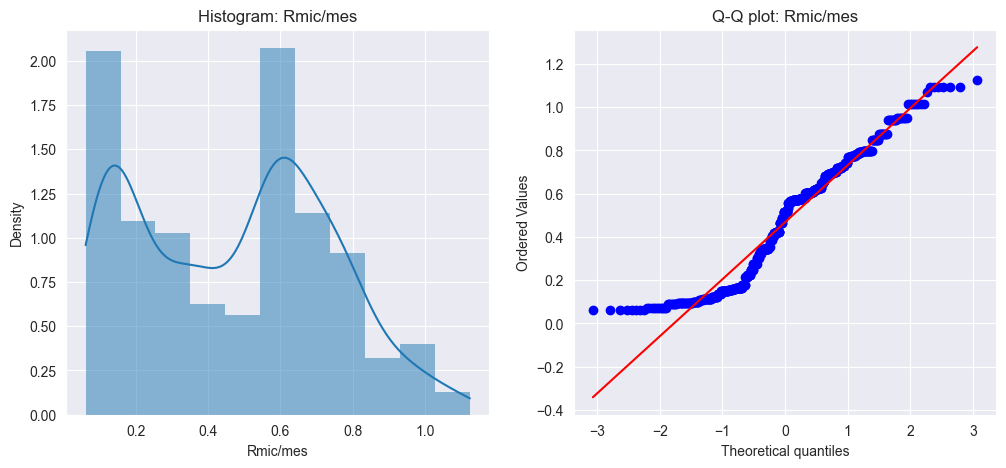

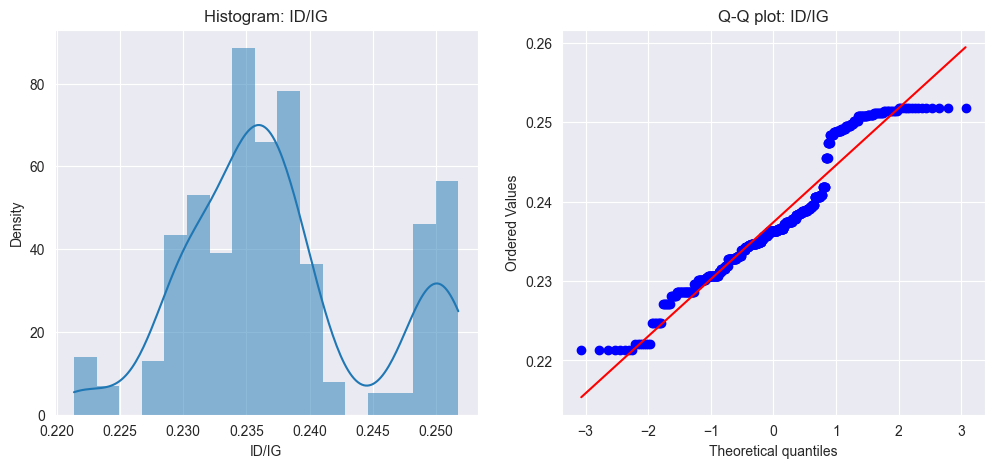

In [6]:
from scipy import stats

# Box-Cox转换，返回转换后的数据和最佳lambda值
data['Rmic/mes'], fitted_lambda = stats.boxcox(data['Rmic/mes'] + 1)  # 加1以处理0值
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# 直方图
sns.histplot(data['Rmic/mes'], kde=True, stat="density", linewidth=0, ax=ax[0])
ax[0].set_title(f'Histogram: {'Rmic/mes'}')
    
# Q-Q图
stats.probplot(data['Rmic/mes'], dist="norm", plot=ax[1])
ax[1].set_title(f'Q-Q plot: {'Rmic/mes'}') 
plt.show()

data['ID/IG'], fitted_lambda = stats.boxcox(data['ID/IG'] + 1)  # 加1以处理0值
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# 直方图
sns.histplot(data['ID/IG'], kde=True, stat="density", linewidth=0, ax=ax[0])
ax[0].set_title(f'Histogram: {'ID/IG'}')
    
# Q-Q图
stats.probplot(data['ID/IG'], dist="norm", plot=ax[1])
ax[1].set_title(f'Q-Q plot: {'ID/IG'}')
plt.show()

**相关性分析**：分析特征间的相关性，以及它们与目标值之间的关系。

In [7]:
data

,Index,O,N,B,S,P,Specific surface area,Pore volume,Rmic/mes,ID/IG,Electrolyte,Current collector,Active mass loading,Potential window,Current density,target
0,14.0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,1.124369,0.236858,2M ZnSO4,carbon cloth,1.0,1.6,0.10,85.0
1,15.0,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,1.068605,0.237123,2M ZnSO4,carbon cloth,1.0,1.6,0.10,114.0
2,21.0,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.137776,0.228649,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.10,90.2
3,22.0,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.137776,0.228649,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.25,86.3
4,23.0,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.137776,0.228649,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.50,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,808.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.162874,0.250846,2M ZnSO4,stainless-steel mesh,1.0,1.6,5.00,134.0
640,809.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.162874,0.250846,2M ZnSO4,stainless-steel mesh,1.0,1.6,10.00,125.7
641,810.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.162874,0.250846,2M ZnSO4,stainless-steel mesh,1.0,1.6,20.00,118.9
642,811.0,6.93,1.98,0.00,0.0,0.0,3415.3,2.4820,0.162874,0.250846,2M ZnSO4,stainless-steel mesh,1.0,1.6,30.00,114.5
